## 載入套件

In [230]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

## 封閉解價格

In [244]:
def asian_option_closed_form(S0, K, T, r, sigma, option_type):
    """
    :param S: 初始資產價格
    :param K: 選擇權行使價格
    :param T: 選擇權到期日
    :param r: 無風險利率
    :param sigma: 波動率
    :param option_type: 選擇權類型，可以是'call'或'put'
    :return: 亞式選擇權的價格估計
    """
    sigma_G = sigma * (T / np.sqrt(3))
    b = (r - 0.5 * sigma_G**2)
    sqrt_T = np.sqrt(T)
    d1 = (np.log(S0 / K) + (b + 0.5 * sigma_G**2) * T) / (sigma_G * sqrt_T)
    d2 = d1 - sigma_G * sqrt_T

    if option_type == 'call':
        option_price = (S0 * np.exp((b - r) * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2))
    else:
        option_price = (K * np.exp(-r * T) * norm.cdf(-d2) - S0 * np.exp((b - r) * T) * norm.cdf(-d1))

    return option_price, norm.cdf(d1), norm.cdf(d2)

# 設定模擬參數
S0 = 100  # 初始資產價格
K = 100  # 選擇權行使價格
T = 1  # 選擇權到期日
r = 0.05  # 無風險利率
sigma = 0.2  # 波動率
n = 50  # 每期分割的次數（公式解假設可以無限分割）

# 封閉解公式計算亞式選擇權價格
option_price = asian_option_closed_form(S0, K, T, r, sigma, option_type='call')
print(f'亞式選擇權價格（Call）：{option_price}')

option_price = asian_option_closed_form(S0, K, T, r, sigma, option_type='put')
print(f'亞式選擇權價格（Put）：{option_price}')

亞式選擇權價格（Call）：(6.893931378517671, 0.6674972289489853, 0.6245840579554415)
亞式選擇權價格（Put）：(2.6813232030856398, 0.6674972289489853, 0.6245840579554415)


## 價值變化模擬

In [232]:
def asian_option_closed_form(S, K, T, r, sigma, n, dt, option_type):

    Tt = T - dt*n
    sigma_G = sigma * (Tt / np.sqrt(3))
    b = (r - 0.5 * sigma_G**2)
    sqrt_Tt = np.sqrt(Tt)
    d1 = (np.log(S / K) + (b + 0.5 * sigma_G**2) * (Tt)) / (sigma_G * sqrt_Tt)
    d2 = d1 - sigma_G * sqrt_Tt

    if option_type == 'call':
        option_price = (S * np.exp((b - r) * Tt) * norm.cdf(d1) - K * np.exp(-r * Tt) * norm.cdf(d2))

    if option_type == 'put':
        option_price = (K * np.exp(-r * Tt) * norm.cdf(-d2) - S * np.exp((b - r) * Tt) * norm.cdf(-d1))

    return option_price

def asian_option_average_price_path_simulation(S0, K, T, r, sigma, n, m, option_type):
    dt = T / n
    nudt = (r - 0.5 * sigma**2) * dt
    sigsdt = sigma * np.sqrt(dt)
    price_paths = []
    np.random.seed(123)

    for i in range(m):
        S = S0
        price_path = []
        for n1 in range(n):
            option_value = asian_option_closed_form(S, K, T, r, sigma, n1, dt, option_type)
            epsilon = np.random.normal(0, 1)
            S *= np.exp(nudt + sigsdt * epsilon)    
            price_path.append(option_value)
        # print(price_path[0])  # 確認期初價格是否有誤
        price_paths.append(price_path)
        
    return price_paths


## Asian Option Paths Simulation

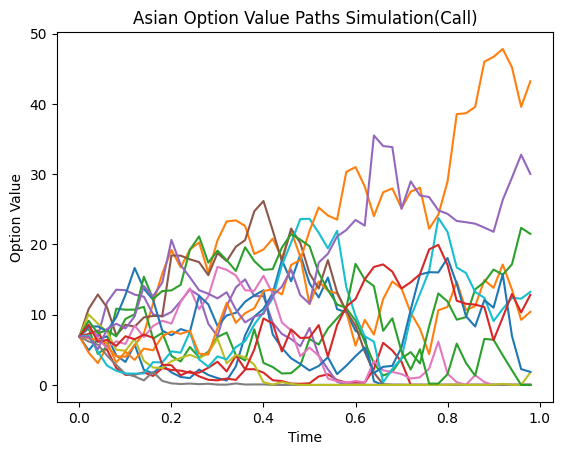

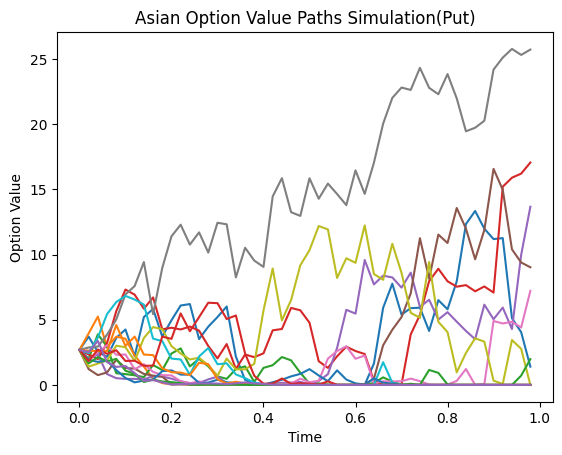

In [233]:
# 設定模擬參數
S0 = 100  # 初始資產價格
K = 100  # 選擇權行使價格
T = 1  # 選擇權到期日
r = 0.05  # 無風險利率
sigma = 0.2  # 波動率
n = 50  # 每期分割的次數
m = 15 # 模擬的次數
option_type = 'call'
price_paths = asian_option_average_price_path_simulation(S0, K, T, r, sigma, n, m, option_type)


# 繪製價值路徑
for i, price_path in enumerate(price_paths):
    plt.plot(np.arange(0, T, T / n), price_path, label=f'Simulation {i + 1}')

plt.xlabel('Time')
plt.ylabel('Option Value')
plt.title('Asian Option Value Paths Simulation(Call)')
# plt.legend()
plt.show()

option_type = 'put'
price_paths = asian_option_average_price_path_simulation(S0, K, T, r, sigma, n, m, option_type)


# 繪製價值路徑
for i, price_path in enumerate(price_paths):
    plt.plot(np.arange(0, T, T / n), price_path, label=f'Simulation {i + 1}')

plt.xlabel('Time')
plt.ylabel('Option Value')
plt.title('Asian Option Value Paths Simulation(Put)')
# plt.legend()
plt.show()

## Greeks Paths Simulation -- Delta

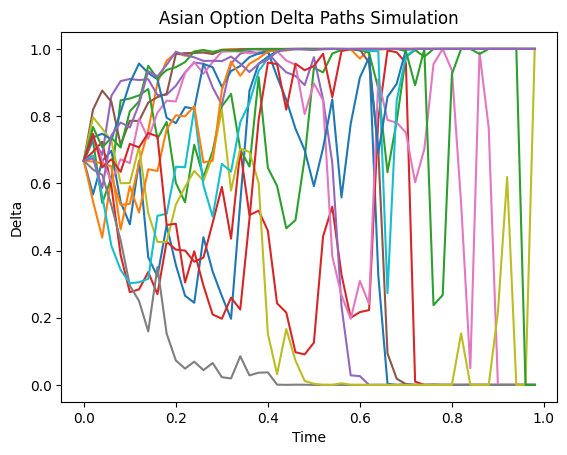

In [245]:
def asian_option_delta(S, K, T, r, sigma, n, dt):

    Tt = T - dt*n
    sigma_G = sigma * (Tt / np.sqrt(3))
    b = (r - 0.5 * sigma_G**2)
    sqrt_Tt = np.sqrt(Tt)
    d1 = (np.log(S / K) + (b + 0.5 * sigma_G**2) * (Tt)) / (sigma_G * sqrt_Tt)
    d2 = d1 - sigma_G * sqrt_Tt

    delta = norm.cdf(d1)

    return delta

def asian_option_delta_path_simulation(S0, K, T, r, sigma, n, m):
    dt = T / n
    nudt = (r - 0.5 * sigma**2) * dt
    sigsdt = sigma * np.sqrt(dt)
    value_paths = []
    np.random.seed(123)

    for i in range(m):
        S = S0
        value_path = []
        for n1 in range(n):
            delta = asian_option_delta(S, K, T, r, sigma, n1, dt)
            epsilon = np.random.normal(0, 1)
            S *= np.exp(nudt + sigsdt * epsilon)    
            value_path.append(delta)
        # print(price_path[0])  # 確認期初價格是否有誤
        value_paths.append(value_path)
        
    return value_paths

# 設定模擬參數
S0 = 100  # 初始資產價格
K = 100  # 選擇權行使價格
T = 1  # 選擇權到期日
r = 0.05  # 無風險利率
sigma = 0.2  # 波動率
n = 50  # 每期分割的次數
m = 15 # 模擬的次數
option_type = 'call'
price_paths = asian_option_delta_path_simulation(S0, K, T, r, sigma, n, m)


# 繪製價值路徑
for i, price_path in enumerate(price_paths):
    plt.plot(np.arange(0, T, T / n), price_path, label=f'Simulation {i + 1}')

plt.xlabel('Time')
plt.ylabel('Delta')
plt.title('Asian Option Delta Paths Simulation')
# plt.legend()
plt.show()